## Gal3D Example: Ellipsoid_S
This example demonstrates how to use Gal3D for three-dimensional modeling of particle distributions in simulated galaxies.

First, Gal3D requires the coordinates (`pos`) and masses (`mass`) of the particles. Here, we use AnastrisTNG to extract stellar particle data from a galaxy in the TNG50 simulation.

In [1]:
from AnastrisTNG import TNGsimulation

path = '/home/yxi/Simulation/sims/TNG50-1/output'
snap =99
snapshot = TNGsimulation.Snapshot(path,snap)

ID = 516760 
sub = snapshot.load_particle(ID,order='star')
sub.physical_units()
coor_trans = sub.face_on(alignwith='star',rmax=8)

pos = sub.s['pos']
mass = sub.s['mass']

Now, let's begin the analysis with Gal3D.

Next, pass `pos` and `mass` to Gal3D for analysis.

In [2]:
from gal3d.analyzer import Gal3DAnalyzer
gal = Gal3DAnalyzer.analyze(pos,mass)

[2025-08-29 21:09:06.716] < gal3d.particle.global_calculator > | INFO | Recentered positions by subtracting center: [-0.0008159  -0.00088915  0.00077898]
[2025-08-29 21:09:06.753] < gal3d.plugin > | INFO | DensityEstimator loaded plugins: DensityEstimatorKNN
[2025-08-29 21:09:06.759] < gal3d.particle.density_estimator.DensityEstimatorKNN > | INFO | Build KDTree with options: {'leafsize': 16, 'workers': 16}
[2025-08-29 21:09:10.943] < gal3d.analyzer > | INFO | Set inner value to 1.53e+10
[2025-08-29 21:09:10.944] < gal3d.analyzer > | INFO | Set outer value to 5.75e+04
[2025-08-29 21:09:10.970] < gal3d.preprocessing.spherical_field.spherical_vector > | INFO | 1024 points on the sphere by fibonacci method have the uniformity of 99.688
[2025-08-29 21:09:10.971] < gal3d.field.SphField > | INFO |  build ray vector: 0.03 sec
[2025-08-29 21:09:11.733] from < field.py > line: 109 
  >>>  | WARNING | The axial ratio of the inner boundary shape is quite extreme. Consider limiting the particles or

In [3]:
res_ellipsoid_s = gal.fit(num_step=300)

[2025-08-29 21:09:23.787] < gal3d.plugin > | INFO | FitWorkflow loaded plugins: EllipsoidFitWorkflow
[2025-08-29 21:09:23.788] < gal3d.analyzer > | INFO | Using workflow: EllipsoidFitWorkflow
Fitting radii: 100%|██████████| 300/300 [00:41<00:00,  7.18it/s]


Let's see some parameter profiles with estimated errors.

(0.0, 16.794310861015646)

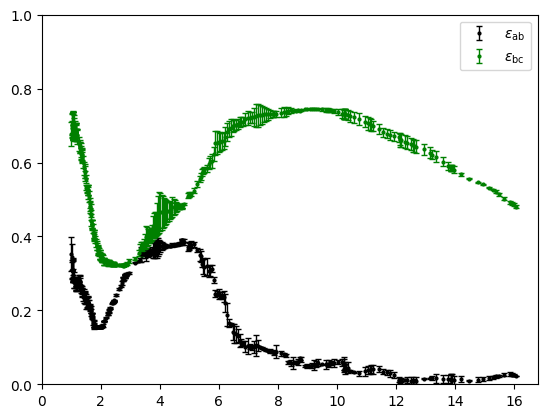

In [6]:
import matplotlib.pyplot as plt
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['eps_ab'],
             yerr=res_ellipsoid_s.error['eps_ab'],label=r"$\epsilon_{\rm ab}$",
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1)

plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['eps_bc'],
             yerr=res_ellipsoid_s.error['eps_bc'],label=r"$\epsilon_{\rm bc}$",
             fmt='o', c='g', capsize=2, markersize=2,linewidth=1)
plt.legend()
plt.ylim(0,1)
plt.xlim(0.,)

(0.0, 16.794310861015646)

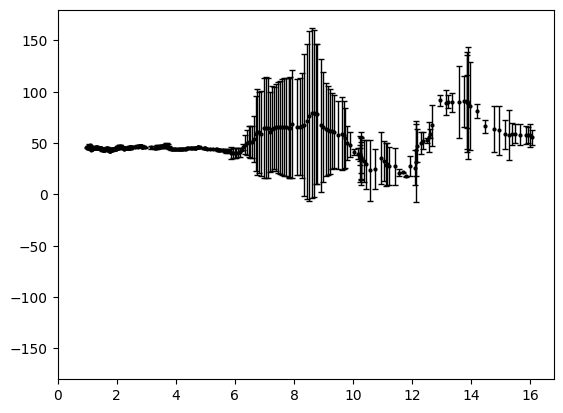

In [7]:
import numpy as np
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['ang1']*180/np.pi,
             yerr=res_ellipsoid_s.error['ang1']*180/np.pi,
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1)

plt.ylim(-180,180)
plt.xlim(0.,)

(0.0, 16.794310861015646)

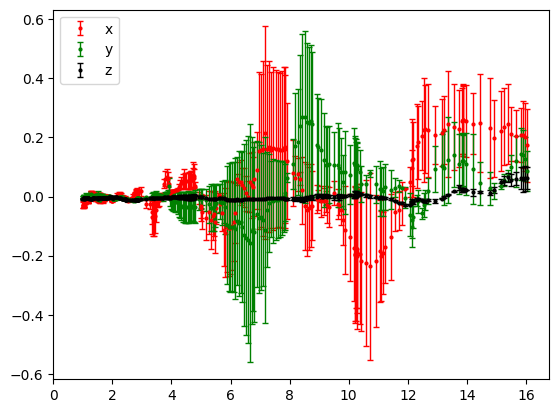

In [8]:
import numpy as np
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['x'],
             yerr=res_ellipsoid_s.error['x'],label="x",
             fmt='o', c='r', capsize=2, markersize=2,linewidth=1)
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['y'],
             yerr=res_ellipsoid_s.error['y'],label="y",
             fmt='o', c='g', capsize=2, markersize=2,linewidth=1)
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['z'],
             yerr=res_ellipsoid_s.error['z'],label="z",
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1)

plt.legend()
plt.xlim(0.,)

You can further analyze the results using Gal3D's built-in tools. This section demonstrates how to measure the bar structure of the galaxy.

In [9]:
from gal3d.characterization import Characterizer
bar = Characterizer.get_plugin('Bar')
bar(res_ellipsoid_s).measure()

[2025-08-29 21:15:51.283] < gal3d.plugin > | INFO | Characterizer loaded plugins: Bar


{'flag': 1,
 'eps_max': 0.3527585481227881,
 'R_max': 1.0040068780929778,
 'R_bar': 1.0494686673509115}

Finally, visualize the fitted model alongside the real data.

In [10]:
from gal3d.visualization.model_projector import ModelProjector
from gal3d.visualization.data_model_residual import show_image_model_residual
ellipsoid_s_model = ModelProjector.get_plugin('ProjectorLineIntegration')(res_ellipsoid_s)

[2025-08-29 21:16:20.894] < gal3d.plugin > | INFO | ModelProjector loaded plugins: ProjectorLineIntegration, ProjectorSphGrid
[2025-08-29 21:16:20.896] < gal3d.visualization.ModelProjector > | INFO | Projector removed 11 steps with relatively large fit error


Integrating Profiles: 100%|██████████| 22500/22500 [00:01<00:00, 11835.47it/s]


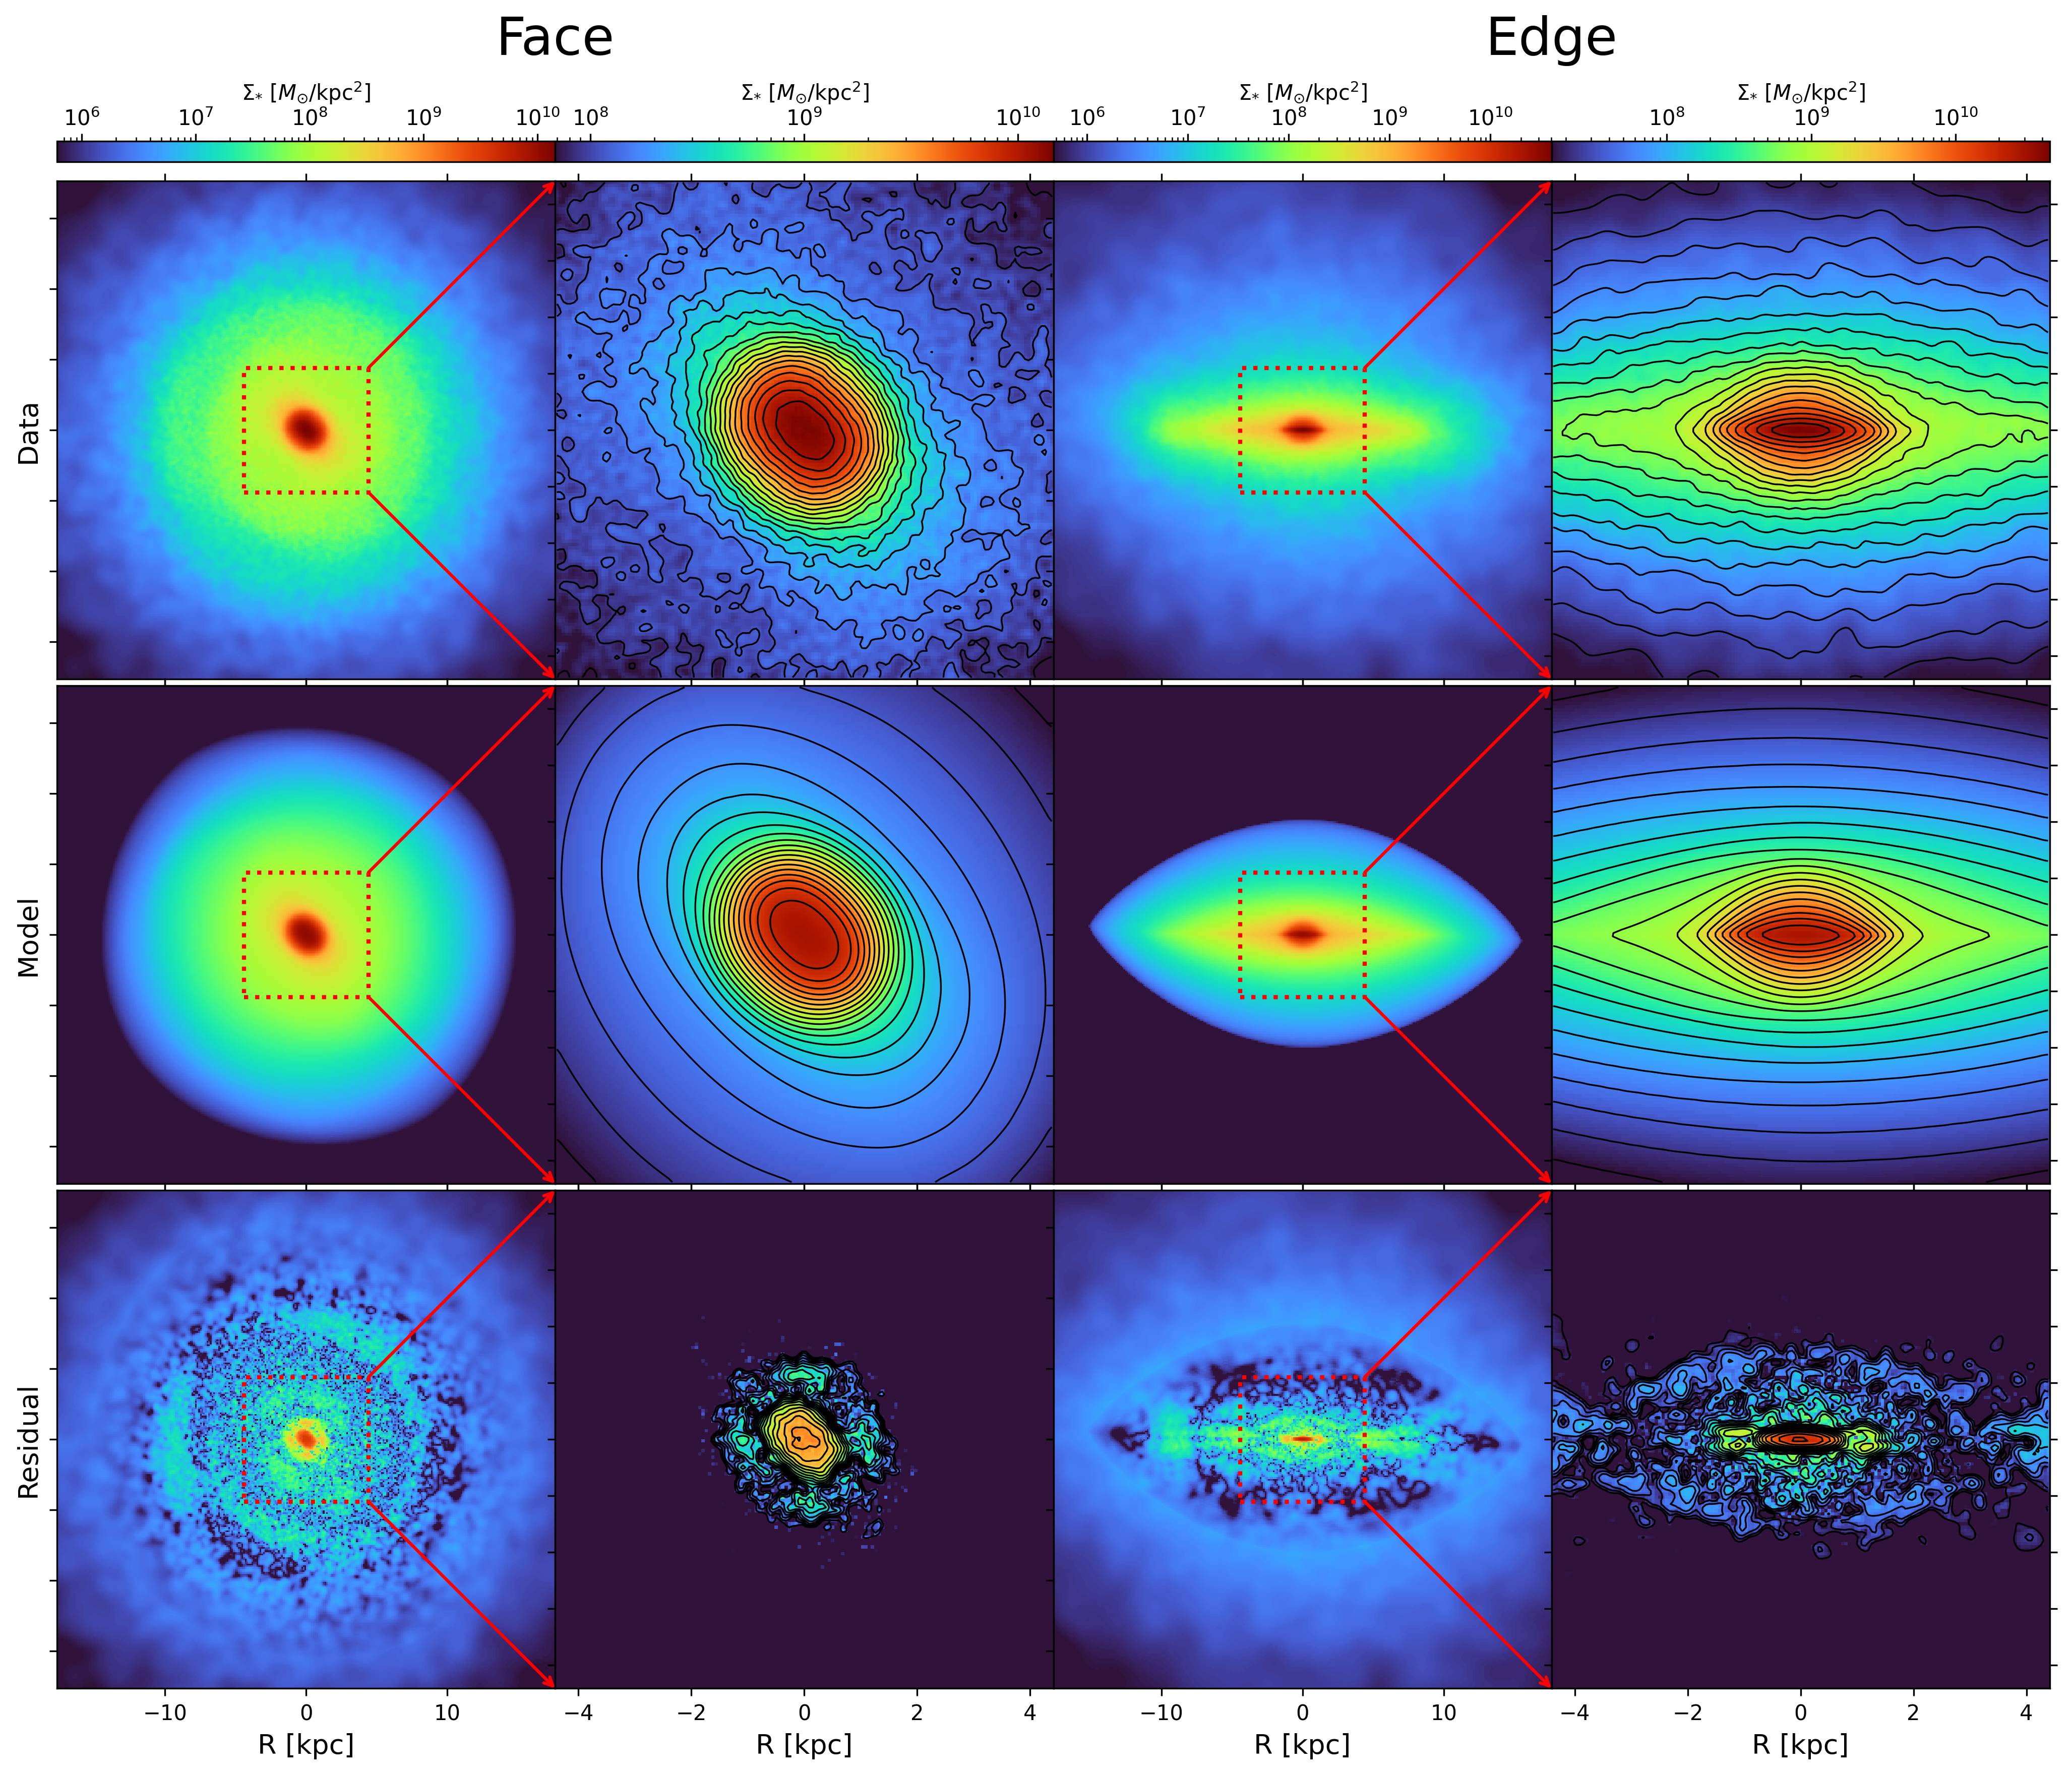

In [11]:
box_lh_max =res_ellipsoid_s['a'][-1]*1.1
zoom_lh_max = box_lh_max/4
fig = show_image_model_residual(gal.particle,ellipsoid_s_model,
                          large_box_x_range = (-box_lh_max,box_lh_max),
                          large_box_y_range= (-box_lh_max,box_lh_max),
                          zoom_x_range=(-zoom_lh_max,zoom_lh_max),
                          zoom_y_range=(-zoom_lh_max,zoom_lh_max),
                          depth_z_range=(-box_lh_max,box_lh_max),
                          nbins_large = 300,
                          nbins_zoom = 150,
                          nlevels_large=0,
                          nlevels_zoom=22)